In [1]:
import cv2
import numpy as np
import requests

IP = 'http://192.168.1.38'
# IP = 'http://192.168.1.88'

In [10]:
import torch
import torchvision
import torch.nn.functional as F

print('setup...')
categories = ['orzo', 'rocks']
device = torch.device('cuda')
model = torchvision.models.resnet18(pretrained=True)
model.fc = torch.nn.Linear(512, len(categories))
model = model.to(device)
state_dict = torch.load('we_ball.pth')
model.load_state_dict(state_dict)
print('setup complete!')


def handler(image):
    with torch.no_grad():
        model.eval()
        result = model(image)
    output = F.softmax(result, dim=1).detach().cpu().numpy().flatten()
    for i, score in enumerate(list(output)):
        print(str(i) + " " + str(score))
    print(categories[output.argmax()])
    return output.argmax()

setup...
setup complete!


captured
entering preprocess...
entering hanlder...
0 0.9881265
1 0.01187346
orzo
orzo


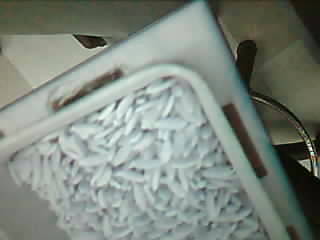

--------------------
captured
entering preprocess...
entering hanlder...
0 0.9908009
1 0.009199099
orzo
orzo


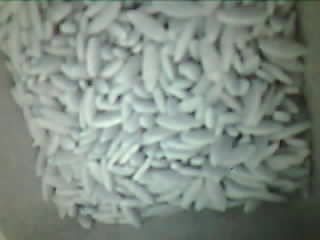

--------------------
captured
entering preprocess...
entering hanlder...
0 0.8986
1 0.1014
orzo
orzo


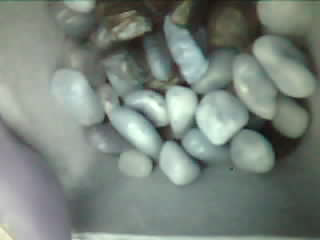

--------------------
captured
entering preprocess...
entering hanlder...
0 0.8634248
1 0.13657522
orzo
orzo


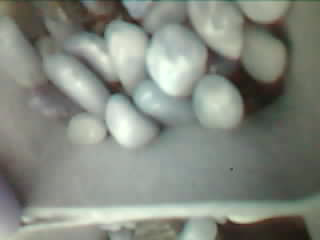

--------------------
captured
entering preprocess...
entering hanlder...
0 0.8719789
1 0.12802105
orzo
orzo


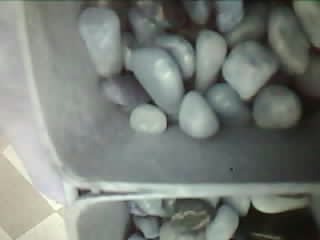

--------------------
captured
entering preprocess...
entering hanlder...
0 0.8356828
1 0.16431725
orzo
orzo


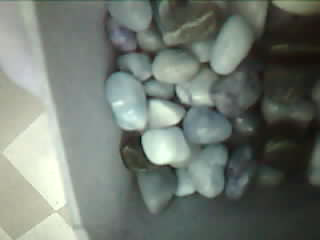

--------------------
captured
entering preprocess...
entering hanlder...
0 0.9194601
1 0.08053984
orzo
orzo


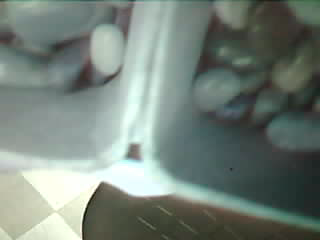

--------------------
captured
entering preprocess...
entering hanlder...
0 0.90581816
1 0.09418182
orzo
orzo


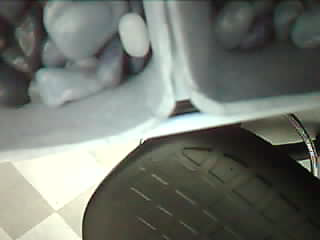

--------------------
captured
entering preprocess...
entering hanlder...
0 0.23804836
1 0.7619517
rocks
rocks


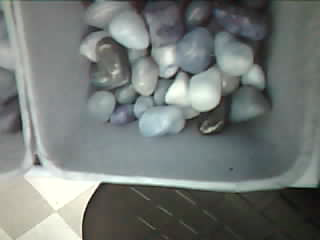

--------------------
captured
entering preprocess...
entering hanlder...
0 0.04998266
1 0.9500174
rocks
rocks


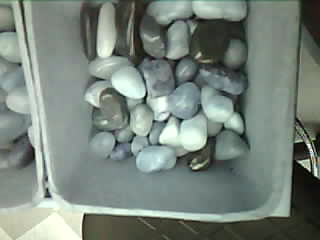

--------------------
captured
entering preprocess...
entering hanlder...
0 0.201752
1 0.798248
rocks
rocks


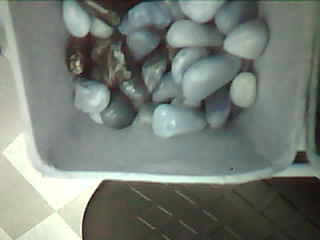

--------------------
captured
entering preprocess...
entering hanlder...
0 0.08103117
1 0.9189688
rocks
rocks


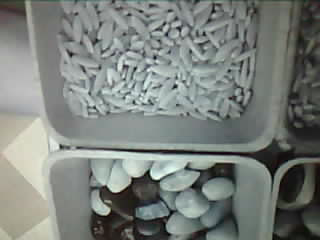

--------------------
captured
entering preprocess...
entering hanlder...
0 0.11054293
1 0.88945705
rocks
rocks


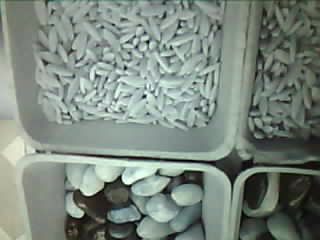

--------------------
captured
entering preprocess...
entering hanlder...
0 0.9952604
1 0.004739609
orzo
orzo


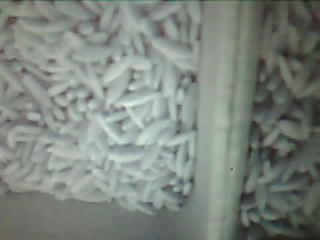

--------------------
captured
entering preprocess...
entering hanlder...
0 0.98011935
1 0.019880634
orzo
orzo


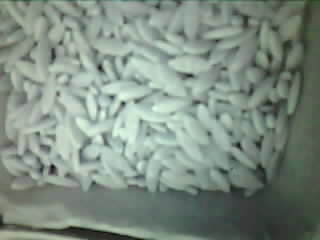

--------------------
captured
entering preprocess...
entering hanlder...
0 0.565051
1 0.43494898
orzo
orzo


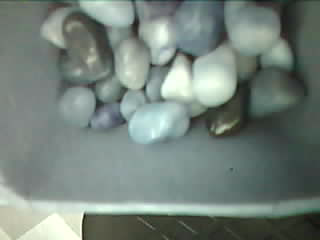

--------------------
captured
entering preprocess...
entering hanlder...
0 0.06962491
1 0.9303751
rocks
rocks


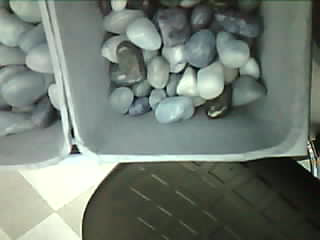

--------------------
captured
entering preprocess...
entering hanlder...
0 0.44522154
1 0.55477846
rocks
rocks


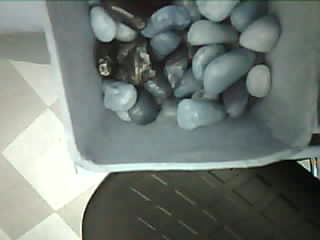

--------------------
captured
entering preprocess...
entering hanlder...
0 0.05835379
1 0.9416462
rocks
rocks


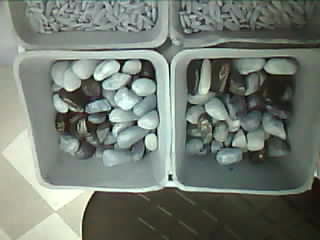

--------------------
captured
entering preprocess...
entering hanlder...
0 0.22479625
1 0.77520376
rocks
rocks


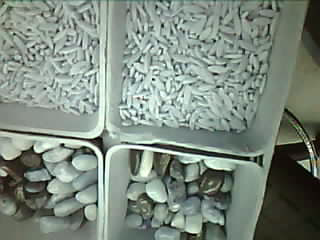

--------------------
captured
entering preprocess...
entering hanlder...
0 0.9949067
1 0.0050932704
orzo
orzo


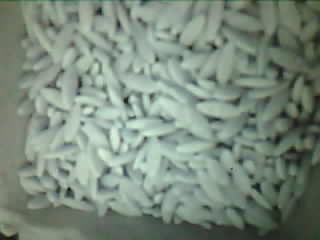

--------------------
captured
entering preprocess...
entering hanlder...
0 0.89710116
1 0.102898866
orzo
orzo


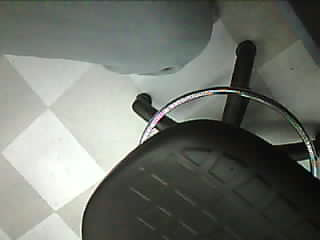

--------------------


KeyboardInterrupt: 

In [11]:
import traitlets
import ipywidgets.widgets as widgets
from IPython.display import display
import PIL
from time import sleep
from utils import preprocess

while True:
    cap = cv2.VideoCapture(IP + ":81/stream")
    if cap.isOpened():
        print("captured")
        ret, frame = cap.read()
    else:
        print("failed capture")

    print('entering preprocess...')
    picture = preprocess(frame)
    
    print('entering hanlder...')
    print(categories[handler(picture)])

    display(PIL.Image.fromarray(frame, mode="RGB"))
    
    cap.release()
    cv2.destroyAllWindows()
    
    print('--------------------')
    sleep(2)